# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [23]:
# Cell 1: Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [24]:
# Cell 2: Load and preprocess data
# Replace 'solar_data.csv' with your file path
df = pd.read_csv('solar_data.csv')

# Feature engineering
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)
df['hour'] = df['DATE_TIME'].dt.hour
df['day_of_year'] = df['DATE_TIME'].dt.dayofyear
df['month'] = df['DATE_TIME'].dt.month

# Normalize features and target
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['hour', 'day_of_year', 'month']].values)
y = scaler.fit_transform(df[['AC_POWER']].values).flatten()  # Flatten to 1D


In [25]:
# Cell 3: Define a stable linear regression model
class LinearRegression:
    def __init__(self, learning_rate=1e-4, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        np.random.seed(42)  # For reproducibility
        self.weights = np.random.uniform(-0.01, 0.01, X.shape[1])  # Small random initialization
        self.bias = 0
        n = X.shape[0]

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Gradient calculation
            dw = (1/n) * np.dot(X.T, error)
            db = (1/n) * np.sum(error)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute loss (Mean Squared Error)
            loss = (1/n) * np.sum(error ** 2)

            # Check for numerical instability
            if np.isnan(loss) or np.isinf(loss):
                print(f"Numerical instability detected at epoch {epoch}. Halting.")
                break

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [26]:
# Cell 4: Train the model
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression(learning_rate=1e-4, epochs=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Epoch 0, Loss: 0.1235940526215475
Epoch 10, Loss: 0.12343729453943598
Epoch 20, Loss: 0.12328112203258967
Epoch 30, Loss: 0.12312553289314444
Epoch 40, Loss: 0.12297052492156985
Epoch 50, Loss: 0.12281609592663774
Epoch 60, Loss: 0.122662243725391
Epoch 70, Loss: 0.12250896614311205
Epoch 80, Loss: 0.12235626101329221
Epoch 90, Loss: 0.12220412617760018


Mean Squared Error: 0.12098213619891696
Mean Absolute Error: 0.21704817817376426


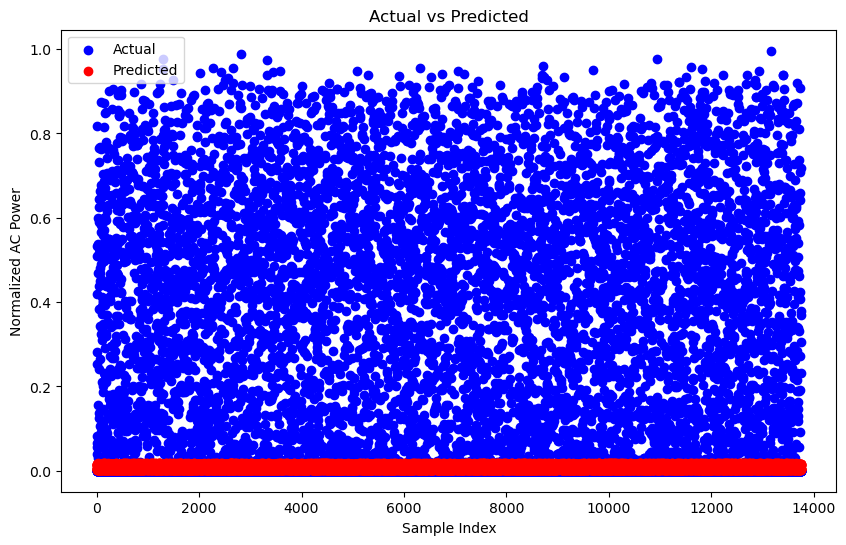

In [27]:
# Cell 5: Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Normalized AC Power')
plt.show()


In [28]:
# from sklearn._loss import loss
# 
# 
# # Cell 6: Add early stopping
# class LinearRegressionWithEarlyStopping(LinearRegression):
#     def fit(self, X, y, X_val, y_val, patience=10):
#         self.weights = np.random.uniform(-0.01, 0.01, X.shape[1])  # Small random initialization
#         self.bias = 0
#         n = X.shape[0]
#         best_loss = float('inf')
#         patience_counter = 0
# 
#         for epoch in range(self.epochs):
#             y_pred = np.dot(X, self.weights) + self.bias
#             error = y_pred - y
# 
#             # Gradient calculation
#             dw = (1/n) * np.dot(X.T, error)
#             db = (1/n) * np.sum(error)
# 
#             # Update weights and bias
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db
# 
#             # Validation loss
#             y_val_pred = np.dot(X_val, self.weights) + self.bias
#             val_loss = (1/X_val.shape[0]) * np.sum((y_val_pred - y_val) ** 2)
# 
#             # Check for early stopping
#             if val_loss < best_loss:
#                 best_loss = val_loss
#                 patience_counter = 0
#             else:
#                 patience_counter += 1
# 
#             if patience_counter >= patience:
#                 print(f"Early stopping at epoch {epoch}. Best validation loss: {best_loss}")
#                 break
# 
#             if epoch % 10 == 0:
#                 print(f"Epoch {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}")
